In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')

- Affichage de trois derniere lignes

In [4]:
df.tail(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
883,0,2,male,28.0,0,0,10.500,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


- **Récuperation des variables numériques**

In [5]:
df = df.select_dtypes(include=['int64','float64']) # On récupere toutes les variables quantitatives

- **Verification des valeurs manquantes**

In [6]:
def check_missing_values(df):
    return df.isna().sum()

- **La fonction suivante permet de supprimer les valeurs manquantes**

In [7]:
def remove_missing_values(df):
    return df.dropna(inplace = True)

- **La fonction suivante permet de vérifier la presence des valeurs aberrantes**

In [8]:
def check_outliers(df):
    return df.boxplot(figsize =(15, 5))

- **On va ploter toutes nos variables**

In [9]:
def histogram(df):
    return df.hist(figsize =(15, 8))

In [10]:
check_missing_values(df)

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [11]:
remove_missing_values(df)

In [12]:
cp = df

In [13]:
check_missing_values(df)

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

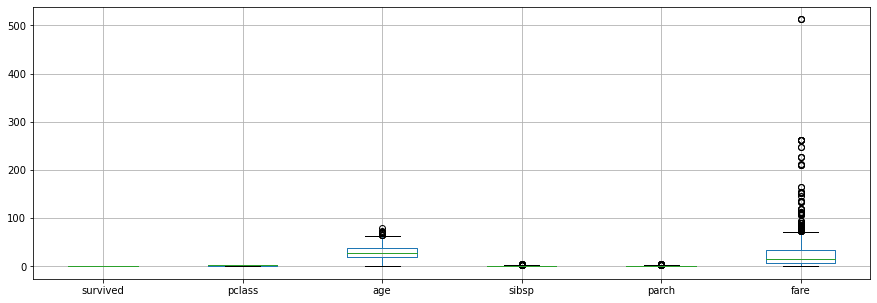

In [14]:
check_outliers(df);

Avant d'utiliser une methode de feature scaling


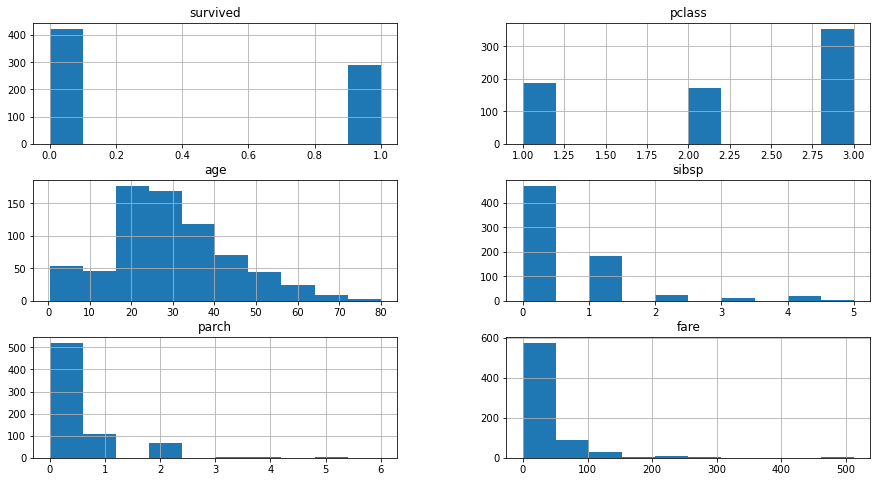

In [15]:
histogram(df)
print("Avant d'utiliser une methode de feature scaling")

**FEATURE SCALING**
- ***MinMaxScaler***

In [16]:
mms = MinMaxScaler()

In [17]:
df_mms = pd.DataFrame(mms.fit_transform(df), columns=df.columns)

In [18]:
df_mms.head(3)

,survived,pclass,age,sibsp,parch,fare
0,0.0,1.0,0.271174,0.2,0.0,0.014151
1,1.0,0.0,0.472229,0.2,0.0,0.139136
2,1.0,1.0,0.321438,0.0,0.0,0.015469


In [19]:
cp.head(3)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


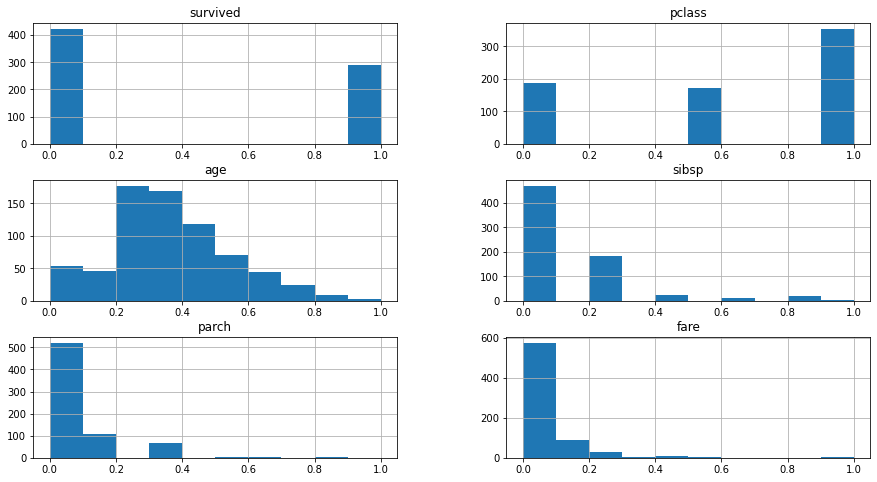

In [20]:
histogram(df_mms);

Apres MinMaxScaler


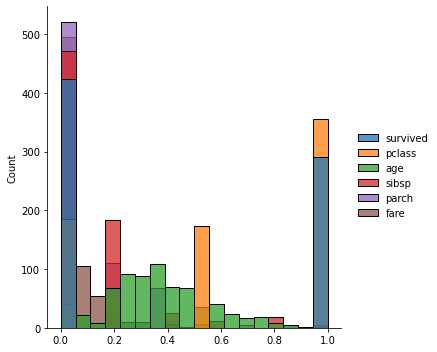

In [21]:
sb.displot(data=df_mms)
print("Apres MinMaxScaler")

**FEATURE SCALING**
- **MaxAbsScaler :**


In [22]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()

In [23]:
df_mas = pd.DataFrame(mas.fit_transform(df), columns=df.columns)

In [24]:
df_mas.head(3)

,survived,pclass,age,sibsp,parch,fare
0,0.0,1.000000,0.275,0.2,0.0,0.014151
1,1.0,0.333333,0.475,0.2,0.0,0.139136
2,1.0,1.000000,0.325,0.0,0.0,0.015469


Apres avoir utilisé MinAbsScaler


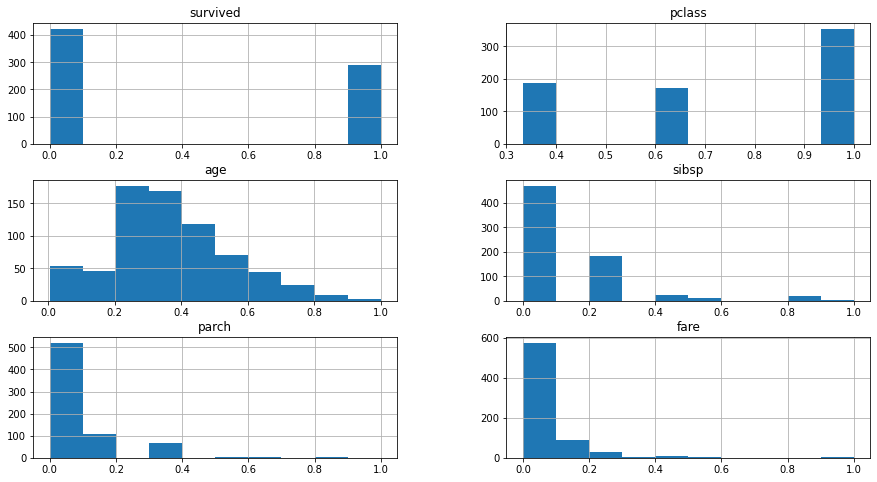

In [25]:
histogram(df_mas)
print("Apres avoir utilisé MinAbsScaler")

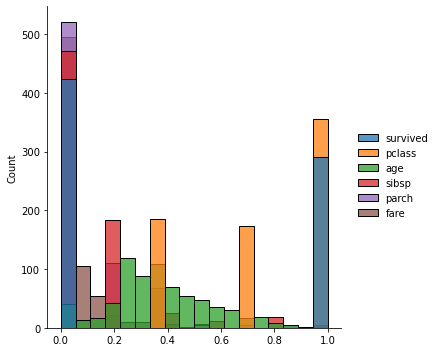

In [26]:
sb.displot(data=df_mas);

**FEATURE SCALING**
- ***RobustScaler***

In [27]:
rs = RobustScaler() 

In [28]:
df_rs = pd.DataFrame(rs.fit_transform(df), columns=df.columns) 

Apres avoir utilisé RobustScaler


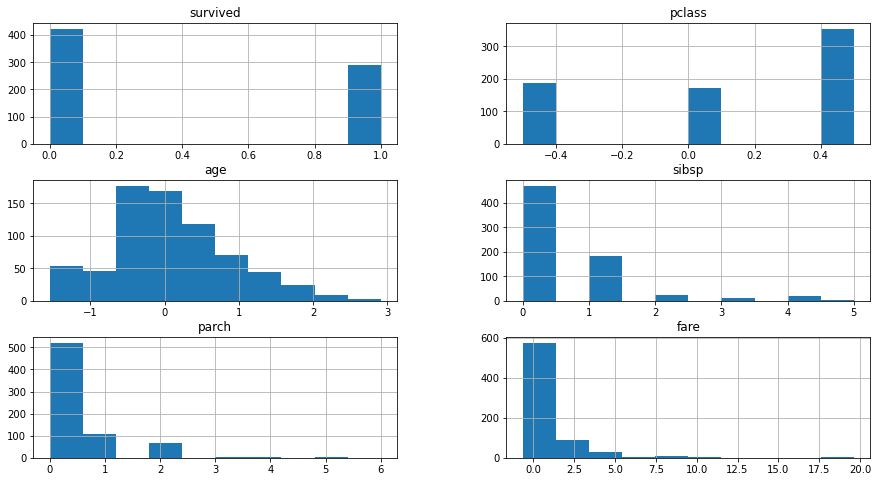

In [29]:
histogram(df_rs)
print('Apres avoir utilisé RobustScaler')

In [30]:
cp.head(3)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


In [31]:
df_rs.head(3)

,survived,pclass,age,sibsp,parch,fare
0,0.0,0.5,-0.335664,1.0,0.0,-0.335309
1,1.0,-0.5,0.559441,1.0,0.0,2.193153
2,1.0,0.5,-0.111888,0.0,0.0,-0.308655


**FEATURE SCALING**
- ***StandardScaler***

In [32]:
ss = StandardScaler()

In [33]:
df_ss = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

Apres avoir utilisé StandardScaler


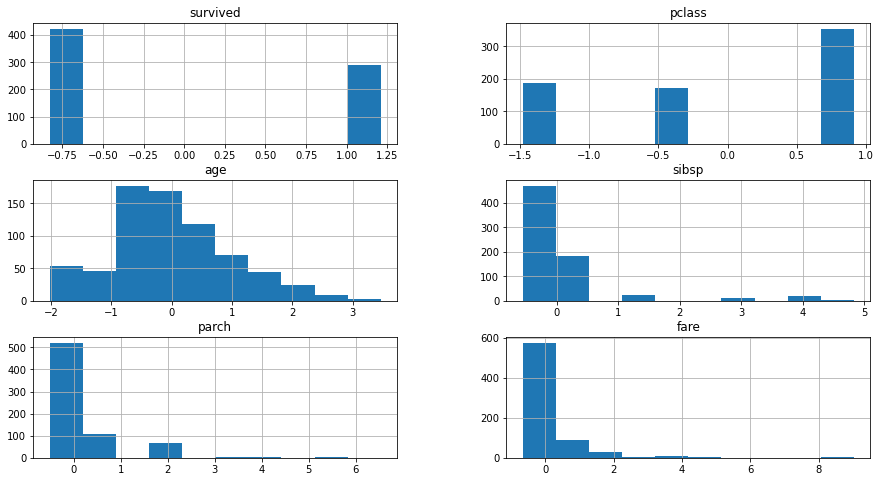

In [34]:
histogram(df_ss)
print('Apres avoir utilisé StandardScaler')

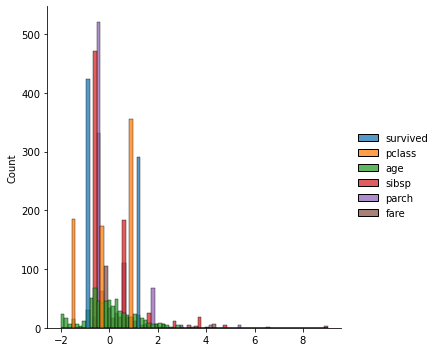

In [35]:
sb.displot(data=df_ss);

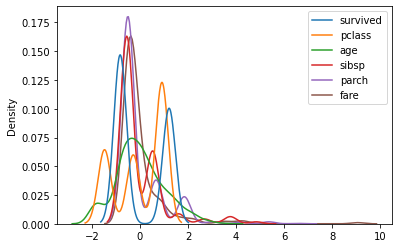

In [36]:
sb.kdeplot(data = df_ss);

In [37]:
df_ss.head(3)

,survived,pclass,age,sibsp,parch,fare
0,-0.82702,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,1.20916,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,1.20916,0.911232,-0.254825,-0.551703,-0.505895,-0.506214


In [38]:
cp.head(3)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


- **S'abonner à la chaine https://www.youtube.com/channel/UCE-613S-bsuLukwHDhnRxIA/?sub_confirmation=1**

- **Vidéo associée à ce notebook:** **https://www.youtube.com/watch?v=61rX0O2jEZ8**
- **Merci d'ajouter aussi une étoile sur mon github si ce notebook vous est utile**.